# Problema 3.12

En la figura 1 se muestra un bloque macizo de arcilla que se extrajo temporalmente de un muro estructural.





In [1]:
import numpy as np
from numpy import array, cross, dot , sqrt
from sympy import *
from IPython.display import Image,Latex

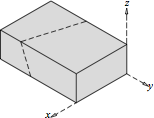

In [2]:
Image(filename='FIGURES/Ejer3_12_1.png',width=250)

Por efecto de funcionamiento del muro, todos los puntos al interior del bloque se ven sometidos al estado de esfuerzos presentado en la figura 2.

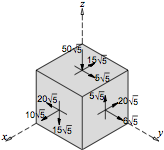

In [3]:
Image(filename='FIGURES/Ejer3_12_2.png',width=250)

    Ahora, para examinar el bloque este fue cortado como se muestra en la figura 3:

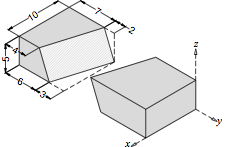

In [4]:
Image(filename='FIGURES/Ejer3_12_3.png',width=250)

y para colocarlo nuevamente en el muro, las 2 piezas en que fue dividido se unirán con un pegamento, que con el tiempo incrementa su resistencia ante esfuerzos tangenciales y esfuerzos de tracción, tal como se muestra en la figura 4

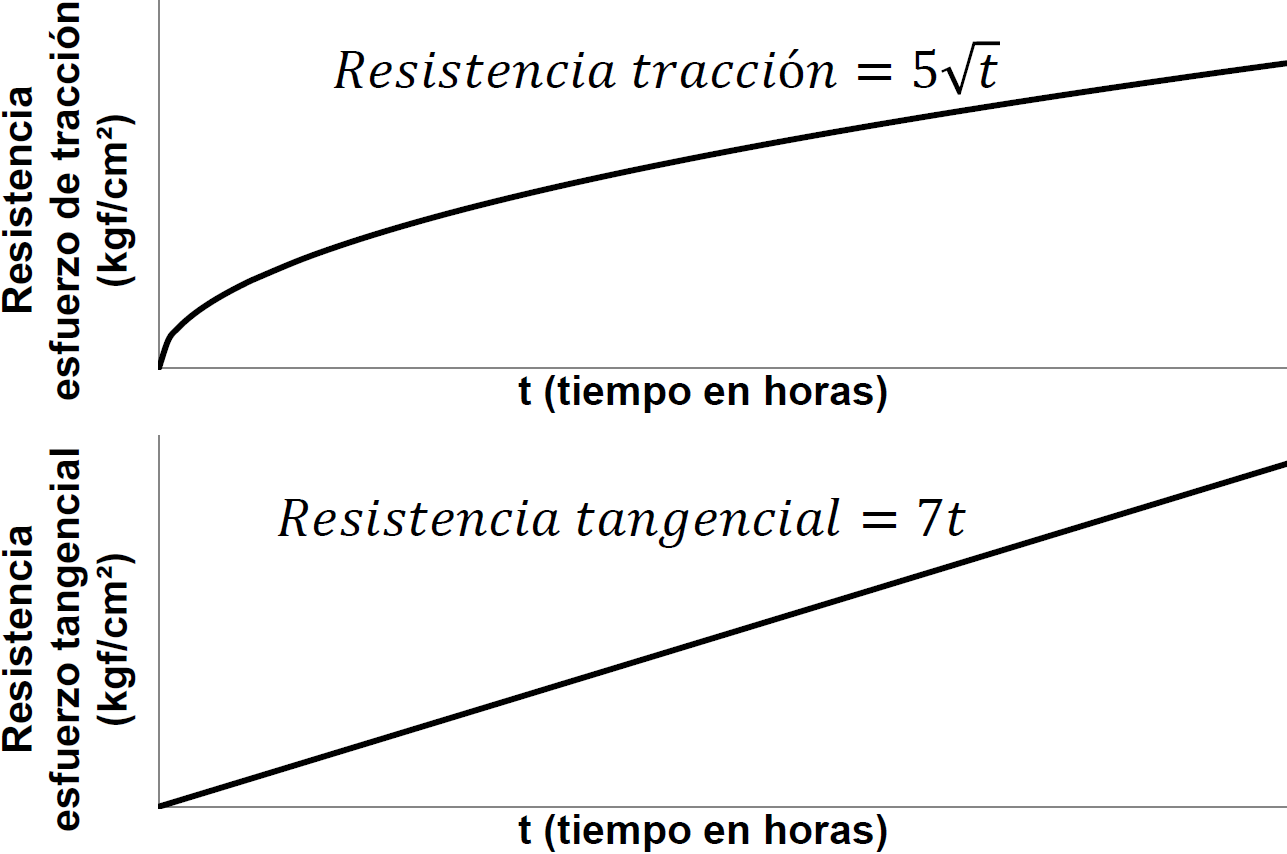

In [5]:
Image(filename='FIGURES/Ejer3_12_4.png',width=300)

### Determine cual es el tiempo mínimo que se debe esperar tras aplicar el pegamento para poder colocar el bloque nuevamente en el muro sin que falle.

## Solución:

Se determina inicialmente el vector normal al plano de corte para lo cual es conveniente seleccionar 3 puntos contenidos en el plano. En este caso es también conveniente fijar el origen en la esquina inferior izquierda (ver figura 3), y tomar desde allí vectores posición a 2 puntos sobre el plano. Marcando estos puntos como $A$ y $B$ se tiene:

In [6]:
ra = array([-10,3,0])
rb = array([0,-2,5])

In [7]:
print ra, rb

[-10   3   0] [ 0 -2  5]


Via producto cruz se determina el vector normal al plano: 

$$ \hat{n} = \vec{r}_a \times \vec{r}_b $$

In [8]:
N = cross(ra,rb)
mag = sqrt(N.dot(N))
n = array([N[0]/mag, N[1]/mag, N[2]/mag])
mag = sqrt(n.dot(n))
print n , mag

[3*sqrt(5)/25 2*sqrt(5)/5 4*sqrt(5)/25] 1


De otro lado el tensor de tensiones esta dado por:

In [9]:
r5 = sqrt(5.0)
sigma = array([[10.0, -20.0 , -15.0] , [-20.0 , 6.0, 5.0] , [-15.0, 5.0, -50.0]])
sigma = sigma*r5
print sigma

[[22.3606797749979 -44.7213595499958 -33.5410196624969]
 [-44.7213595499958 13.4164078649987 11.1803398874989]
 [-33.5410196624969 11.1803398874989 -111.803398874989]]


Con el cual es posible calcular el vector de tracciones sobre el plano con vector normal $n$ usando la formula de Cauchy:

$$\vec t = \left[ \sigma  \right] \cdot \hat n$$


In [10]:
t = dot(sigma,n)
print t

[-20.5718253929981*sqrt(5) 1.78885438199983*sqrt(5)
 -17.4413302244984*sqrt(5)]


Ahora determinemos la componente normal de $\vec{t}$ sobre el plano inclinado usando:

$${\sigma _n} = \vec t \cdot \hat n$$

In [11]:
magt = sqrt(t.dot(t))
signn = dot(t,n)
print signn

-22.7184506513979


Y finalmente para determinar la tensión a cortante se usa:
    
$${\tau ^2} = \vec t \cdot \vec t - \sigma _n^2$$    

In [12]:
tausq = dot(t,t)-signn*signn
tau = sqrt(tausq)
print tau

56.0077851731346


Notando que la tensión normal es a compresión se concluye que la falla se presenta a corte. Usando la ecuación:

$$\tau = 7t$$

se tiene que el tiempo para montar la pieza sin que se produzca la falla es:


In [13]:
t = tau/7
print t

8.00111216759066


In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()